# Iris Data Notebook

All code taken from Randal S. Olson's [tutorial](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb).

## 1. Answering the question.

> Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

> Did you define the metric for success before beginning?

> Did you record the experimental design?

> Did you consider whether the question could be answered with the available data?

## 2. Checking the data. 

- Is there anything wrong with the data?
- Are there any quirks with the data?
- Do I need to fix or remove any of the data?

In [8]:
import pandas as pd

iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

Need to look for missing data!!!

Let's fill in the missing NA values.

In [9]:
iris_data = pd.read_csv('data/iris-data.csv', na_values=['NA'])

Now, we can print some stat summaries.

In [10]:
iris_data.describe()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

Now, we know that five `petal_width_cm` entries are missing.

But, numbers don't always help that much. So, let's plot some things instead.

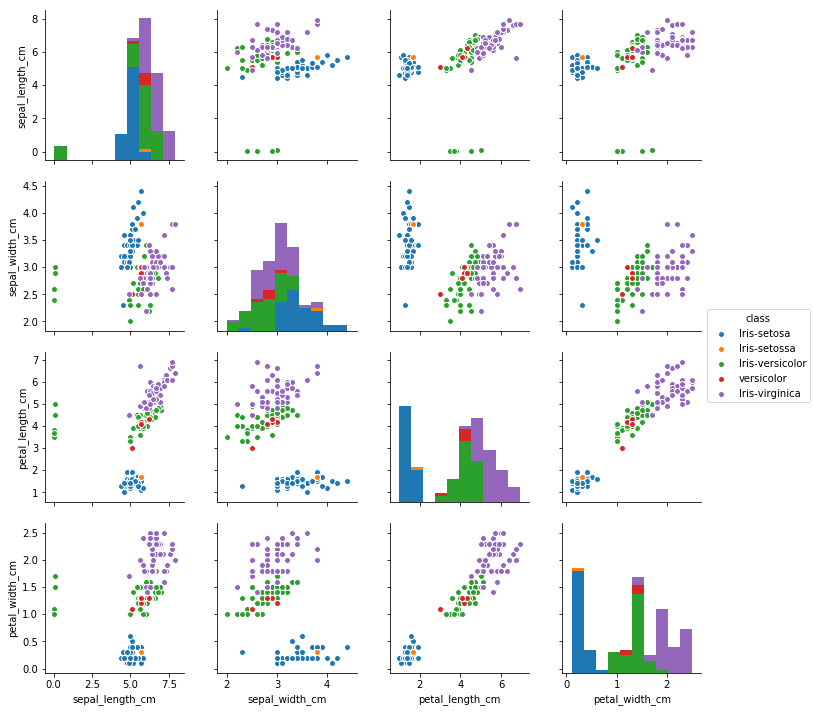

In [11]:
# Show plots inside notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

# Create scatterplot matrix - dist along diagonal, then scatters for every pair of classes
sb.pairplot(iris_data.dropna(), hue='class')

We can already see 3 issues with our data.

1. There are five classes when there should only be three, meaning there were some coding errors.

2. There are some clear outliers in the measurements that may be erroneous: one `sepal_width_cm` entry for Iris-setosa falls well outside its normal range, and several `sepal_length_cm entries` for Iris-versicolor are near-zero for some reason.

3. We had to drop those rows with missing values.

## 3. Tidying the data.

In [12]:
# Fix class type issues
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

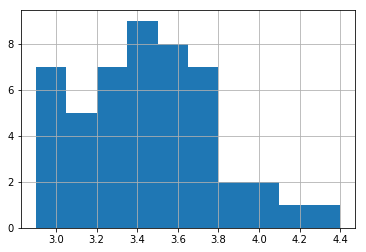

In [13]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [14]:
# Address near-zero petal lengths
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
77            0.067             3.0              5.0             1.7   
78            0.060             2.9              4.5             1.5   
79            0.057             2.6              3.5             1.0   
80            0.055             2.4              3.8             1.1   
81            0.055             2.4              3.7             1.0   

              class  
77  Iris-versicolor  
78  Iris-versicolor  
79  Iris-versicolor  
80  Iris-versicolor  
81  Iris-versicolor

Interesting - all off by 100! Probably didn't convert to cm.

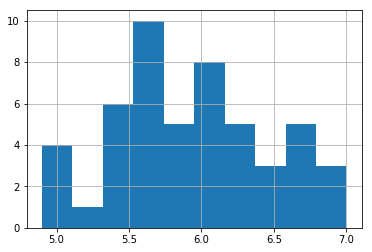

In [15]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

Now, we need to deal with the rows with missing values.

In [16]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5             NaN   
8               4.4             2.9              1.4             NaN   
9               4.9             3.1              1.5             NaN   
10              5.4             3.7              1.5             NaN   
11              4.8             3.4              1.6             NaN   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

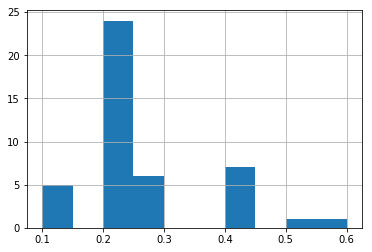

In [17]:
# Let's examine the mean
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [18]:
# Update to have the mean value
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5            0.25   
8               4.4             2.9              1.4            0.25   
9               4.9             3.1              1.5            0.25   
10              5.4             3.7              1.5            0.25   
11              4.8             3.4              1.6            0.25   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

Make sure our data is good now!

In [19]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

Empty DataFrame
Columns: [sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, class]
Index: []

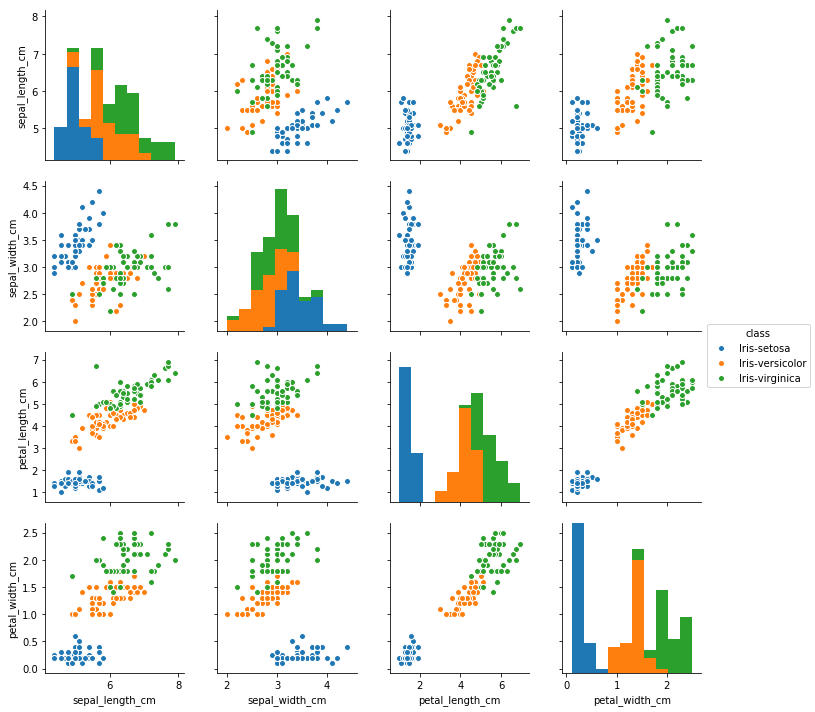

In [21]:
# Save fresh data and re-plot
iris_data.to_csv('data/iris-data-clean.csv', index=False)
iris_data_clean = pd.read_csv('data/iris-data-clean.csv')
sb.pairplot(iris_data_clean, hue='class')

Here are some good general takeaways:

- Make sure your data is encoded properly

- Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range

- Deal with missing data in one way or another: replace it if you can or drop it

- Never tidy your data manually because that is not easily reproducible

- Use code as a record of how you tidied your data

- Plot everything you can about the data at this stage of the analysis so you can visually confirm everything looks correct

## 4. Exploratory analysis. 

- How is my data distributed?

- Are there any correlations in my data?

- Are there any confounding factors that explain these correlations?

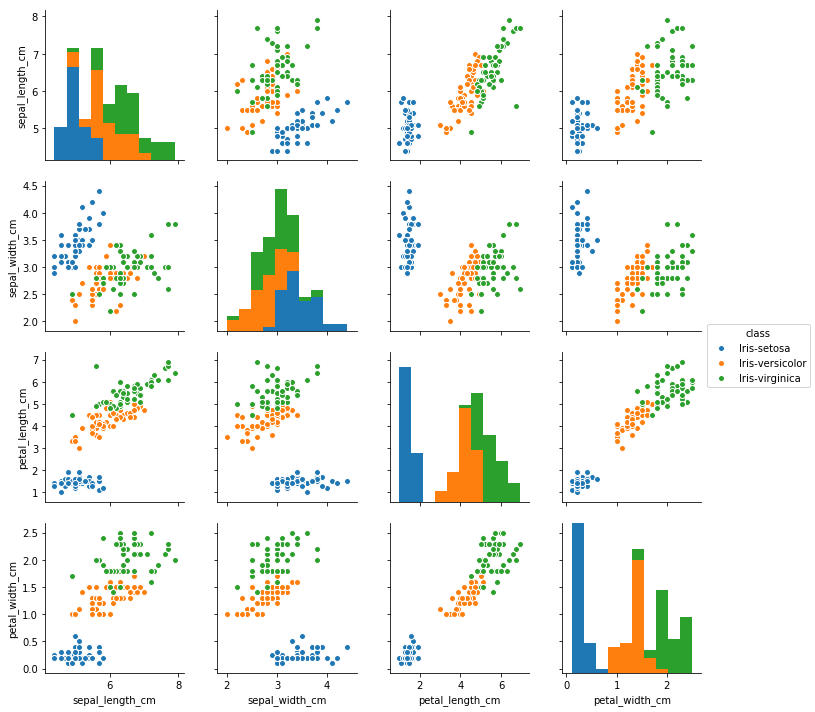

In [22]:
sb.pairplot(iris_data_clean, hue='class')

- Correlations between petal length/width and sepal length/width.
- Can classify well using only petal info.
- Normal distributions.

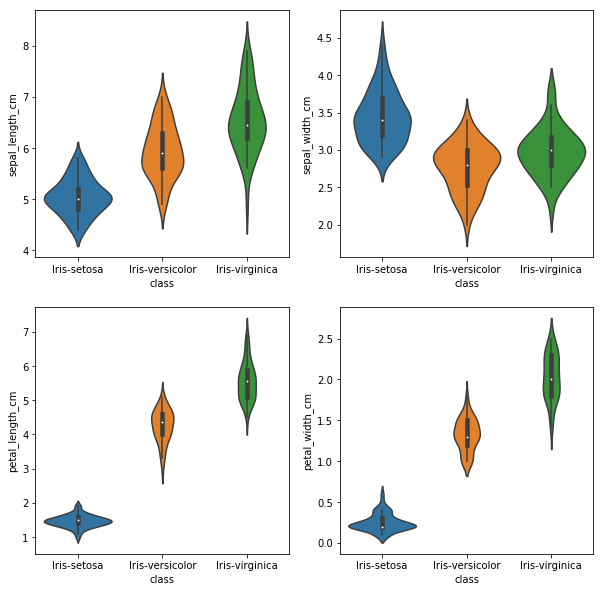

In [24]:
# Make some violin plots
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

## 5. Classification. 

In [26]:
# Convert data to proper format with matrices
iris_data_clean = pd.read_csv('data/iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the classes
all_classes = iris_data_clean['class'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_classes[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [28]:
# Split data
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

/Users/Kevin/Documents/mit/freelance/notebooks/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Let's make a basic decisision tree classifier.

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.97368421052631582

But, there's a catch to this number... Let's train a lot more times.

/Users/Kevin/Documents/mit/freelance/notebooks/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


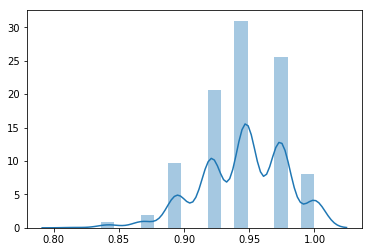

In [30]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)

Let's run some 10 fold cross validation (stratified to maintain class balance) to avoid this **overfitting**.

Text(0.5,1,'Average score: 0.96')

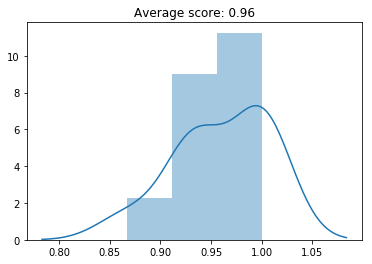

In [32]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Tuning some parameters using a grid search.

In [44]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.959731543624161
Best parameters: {'max_depth': 3, 'max_features': 4}


We can visualize the results of the gridsearch using a heatmap.

Text(33,0.5,'max_depth')

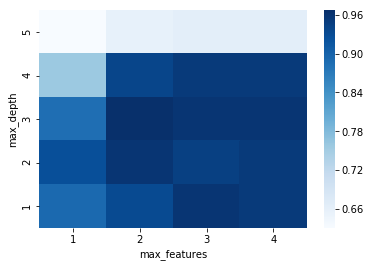

In [34]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Let's add some more parameters and re-search.

In [35]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9664429530201343
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'splitter': 'best'}


In [36]:
# Take the best classifier
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [37]:
# Visualize with GraphViz
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

## 6. Reproducibility. 

In [39]:
%load_ext watermark

In [42]:
%watermark -a 'Kevin Lyons' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Kevin Lyons Fri Dec 29 2017 

CPython 3.6.4
IPython 6.2.1

numpy 1.13.3
pandas 0.21.1
sklearn 0.19.1
matplotlib 2.1.1
seaborn 0.8.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.3.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


Now, it is nice if we convert our work into a real pipeline for later use.

[ 5.6  2.9  3.6  1.3]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 4.8   3.4   1.6   0.25]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 6.8  2.8  4.8  1.4]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 6.8  3.2  5.9  2.3]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 7.7  2.6  6.9  2.3]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 5.7  2.6  3.5  1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 4.8  3.   1.4  0.1]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 6.3  2.5  4.9  1.5]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 4.7  3.2  1.6  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 5.1  3.5  1.4  0.3]	-->	Iris-setosa	(Actual: Iris-setosa)


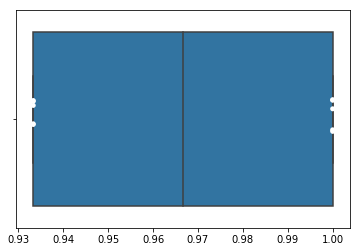

In [43]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('data/iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

And that is all!